In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas para realizar regresión logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss

# Métricas de evaluación
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)

In [4]:
# Visualización de datos
import scikitplot as skplt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16

# Redefinition the habitable zone concept from the view point of thermodynamics dissipative theory on the origin of life

During the last years the detection of habitable planets has been of great interest by the scientific community. Although most of these investigations have been given from the scientific point of view. So far, none of these studies has been proposed from non-equilibrium thermodynamics along with statistical physics out of equilibrium.

Michaelian (2005) has proposed the hypothesis that life is a thermodynamic irreversible process driven by a gen-
eralized chemical potential of a beam of photons, making matter always seek self-organize and thus increase the entropy production of the system. 

In this sense and starting from the hypothesis of the existence of organic cells in some region of the universe, we propose a theoretical model based on irreversible thermodynamics formulated by Michaelian to calculate the entropy production of a habitable zone around of a star. Our theoretical approach is based on the Planck’s equation radiation for the entropy flux of beam of photons, taking into account some physical conditions of the habitable zone around of a star. The entropy production calculated by this method will be compared with the  one obtained by Wei Wu and Yangang Liu (2009), both under certain restrictions. With the obtained data, we apply an artificial intelligence model to predict which is the most relevant physical variables in the entropy production per planet and consequently in the habitability of it.


Obective: Apply Planks entropy flow productions equation to 100 planets considered as being, in the common sense, habitable, then employ a logistic regretion model and random trees to this set of data, make an Descriptive Exploratory Analysis and determine which variables are the most weighted to consider if a planet is or is not habitable. Taking into account that the actual earth's entropy production is 1.23 J/km^3, this is the threshold to determine if it is habitable.

In [5]:
train =pd.read_csv('Datos/Planets_1102.csv')

In [6]:
train.head()

,Object,Star,Star_type,Mass (M?),Radius (R?),Flux,Planet_Temp(K),Period (days),Distance(ly),Refs_Notes,Distance_mother_star(AU),Tem_Star(K),Absolute_magnitud,Radio_Star(m),Albedo,Solar_Flux (W/m^2),Star_radio(AU),Distance_Star_planet(m),Produc_Entropy,Planet_Diameter (m)
0,Earth,SunÃ‚Â (Sol),G2V,1.00,1.00,1.00,255.0,365.24,NaN,[14],1.00000,5772,-3.586867,696000000.0,0.296020,1362.208672,0.004652,1.500000e+11,1.24000,12742.00
1,Teegarden's Star b,Teegarden's Star,M7V,1.05,NaN,1.15,264.0,4.91,12.58,[15],0.02520,"2,637",NaN,91176000.0,0.313029,1.018407,0.000609,3.780000e+09,1.07721,0.00
2,TOI 700 d,TOI 700,M2V,1.72,1.14,0.87,246.0,37.40,101.00,NaN,0.17800,3480,-3.276607,292320000.0,0.171162,31.750744,0.001954,2.670000e+10,1.07721,14525.88
3,K2-72e,K2-72,M?V,2.21,1.29,1.11,261.0,24.20,217.00,[16],0.10600,3360.4733,-4.191025,230368344.0,0.310317,17.146176,0.001540,1.590000e+10,1.54433,16437.18
4,TRAPPIST-1d,TRAPPIST-1,M8V,0.30,0.78,1.04,258.0,4.05,39.00,Confirmed to be rocky[17][18],0.02228,2566,-3.198191,82963200.0,0.340143,0.755992,0.000555,3.342057e+09,1.31665,9938.76


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    99 non-null     object 
 1   Star                      99 non-null     object 
 2   Star_type                 99 non-null     object 
 3   Mass (M?)                 71 non-null     float64
 4   Radius (R?)               77 non-null     float64
 5   Flux                      74 non-null     float64
 6   Planet_Temp(K)            99 non-null     float64
 7   Period (days)             91 non-null     float64
 8   Distance(ly)              86 non-null     float64
 9   Refs_Notes                56 non-null     object 
 10  Distance_mother_star(AU)  92 non-null     float64
 11  Tem_Star(K)               95 non-null     object 
 12  Absolute_magnitud         66 non-null     float64
 13  Radio_Star(m)             99 non-null     float64
 14  Albedo      

 # Data Dictionary

* Star: Name of the star.
* Star_type: Stellar classification.
* Mass (M?): Mass of the planet as a function of the mass of the Earth.
* Radius (R?): Radius of the planet as a function of the radius of the Earth.
* Flux: Solar flux received by the planet depending on the one received by the Earth.
* Planet_Temp(K): Planet temperature.
* Period (days): Number of days of an orbital period as a function of Earth's orbital period.
* Distance(ly): Distance of the star to study the Sun.
* Refs_Notes :Bibliographic reference. 
* Albedo: Amount of Albedo.
* Solar_Flux (W/m^2): Solar flow received by the planet.
* Star_radio(AU): Star radius.
* Distance_Star_planet(m): Distance from the planet to its parent star.
* Produc_Entropy (J/Km^3):Entropy production by planet    
* Planet_Diameter (m): Diameter of planet.

## ------------------------------------------------------------------
 ## Analize, visualize and do data minning to get insights
 
 AED (Descriptive Exploratory Analysis):

In [8]:
train["Tem_Star(K)"] = train["Tem_Star(K)"].str.replace(",","").astype(float)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    99 non-null     object 
 1   Star                      99 non-null     object 
 2   Star_type                 99 non-null     object 
 3   Mass (M?)                 71 non-null     float64
 4   Radius (R?)               77 non-null     float64
 5   Flux                      74 non-null     float64
 6   Planet_Temp(K)            99 non-null     float64
 7   Period (days)             91 non-null     float64
 8   Distance(ly)              86 non-null     float64
 9   Refs_Notes                56 non-null     object 
 10  Distance_mother_star(AU)  92 non-null     float64
 11  Tem_Star(K)               95 non-null     float64
 12  Absolute_magnitud         66 non-null     float64
 13  Radio_Star(m)             99 non-null     float64
 14  Albedo      

In [10]:
train.isnull().sum()

Object                       0
Star                         0
Star_type                    0
Mass (M?)                   28
Radius (R?)                 22
Flux                        25
Planet_Temp(K)               0
Period (days)                8
Distance(ly)                13
Refs_Notes                  43
Distance_mother_star(AU)     7
Tem_Star(K)                  4
Absolute_magnitud           33
Radio_Star(m)                0
Albedo                       5
Solar_Flux (W/m^2)           4
Star_radio(AU)               0
Distance_Star_planet(m)      1
Produc_Entropy               9
Planet_Diameter (m)          1
dtype: int64

In [11]:
train.fillna(train.median(), inplace=True)

/home/julio/Programs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
train.isnull().sum()

Object                       0
Star                         0
Star_type                    0
Mass (M?)                    0
Radius (R?)                  0
Flux                         0
Planet_Temp(K)               0
Period (days)                0
Distance(ly)                 0
Refs_Notes                  43
Distance_mother_star(AU)     0
Tem_Star(K)                  0
Absolute_magnitud            0
Radio_Star(m)                0
Albedo                       0
Solar_Flux (W/m^2)           0
Star_radio(AU)               0
Distance_Star_planet(m)      0
Produc_Entropy               0
Planet_Diameter (m)          0
dtype: int64

In [13]:
train.duplicated().sum()

0

In [14]:

Planet = []
for i in train.Produc_Entropy :
    if i > 1.27:
        Planet.append(1)
    else:
        Planet.append(0)
        
train['Habitable'] = Planet

In [15]:
#Objetive variable
train['Habitable'] = np.where(train.Produc_Entropy > 1.23, 1, 0)
perc_Hb = train.Habitable.mean() * 100
print('Percentage of habitable planets','%1.2f %%'  % perc_Hb)

Porcentaje de planetas habitables 55.56 %


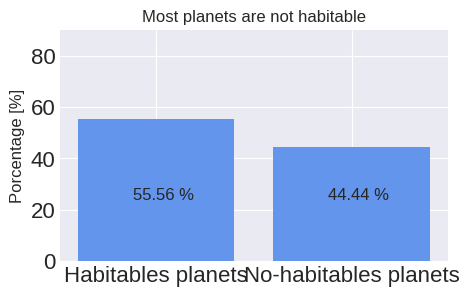

In [16]:
perc_NHb = 100 - perc_Hb
plt.figure(figsize=(5,3))
plt.bar(['Habitables planets', 'No-habitables planets'], [perc_Hb, perc_NHb], color = 'cornflowerblue')
plt.title('Most planets are not habitable', fontsize = 12)
plt.ylabel('Porcentage [%]', fontsize = 12)
plt.ylim(0, 90)
plt.savefig('Habitable_planets.svg', format='svg')
plt.text(-0.12,24,'55.56 %', fontsize=12)
plt.text(0.88,24,'44.44 %', fontsize=12);

# Descriptive Explorative Analysis

* Here we note that from here there is already an habitable zone variable

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    99 non-null     object 
 1   Star                      99 non-null     object 
 2   Star_type                 99 non-null     object 
 3   Mass (M?)                 99 non-null     float64
 4   Radius (R?)               99 non-null     float64
 5   Flux                      99 non-null     float64
 6   Planet_Temp(K)            99 non-null     float64
 7   Period (days)             99 non-null     float64
 8   Distance(ly)              99 non-null     float64
 9   Refs_Notes                56 non-null     object 
 10  Distance_mother_star(AU)  99 non-null     float64
 11  Tem_Star(K)               99 non-null     float64
 12  Absolute_magnitud         99 non-null     float64
 13  Radio_Star(m)             99 non-null     float64
 14  Albedo      

In [18]:
train.describe()

,Mass (M?),Radius (R?),Flux,Planet_Temp(K),Period (days),Distance(ly),Distance_mother_star(AU),Tem_Star(K),Absolute_magnitud,Radio_Star(m),Albedo,Solar_Flux (W/m^2),Star_radio(AU),Distance_Star_planet(m),Produc_Entropy,Planet_Diameter (m),Habitable
count,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000,9.900000e+01,9.900000e+01,99.000000,99.000000,99.000000
mean,6.270486,1.736967,0.96798,254.083333,128.477473,775.553626,1.505214,4338.829831,-4.423949,4.002323e+08,0.075400,530.344766,3.034965e-03,2.233866e+11,1.829299,17602.583913,0.555556
std,33.085565,1.433367,0.31113,98.350012,154.427378,1006.214879,5.394957,1066.005246,1.672496,2.334970e+08,2.181156,787.125243,1.900039e-03,8.096810e+11,5.383689,20538.499498,0.499433
min,0.002180,0.135000,0.26000,35.000000,4.050000,4.250000,0.022280,2566.000000,-9.510453,2.382754e+04,-20.198661,0.755992,1.590000e-07,0.000000e+00,0.003292,0.000000,0.000000
25%,1.025000,1.160000,0.80500,223.075000,24.471770,39.000000,0.122550,3473.000000,-5.156257,2.171520e+08,0.274972,22.688798,1.588797e-03,1.339500e+10,0.861040,1847.590000,0.000000
50%,1.610000,1.610000,1.00000,258.000000,58.430000,410.000000,0.260000,4134.000000,-4.707970,3.967200e+08,0.321363,131.154142,2.744920e-03,3.555000e+10,1.237655,16883.150000,1.000000
75%,1.840000,1.990000,1.15000,275.000000,184.800000,1098.000000,0.671600,5383.000000,-4.418158,5.916755e+08,0.383123,939.787300,4.419786e-03,1.005000e+11,1.565850,25356.580000,1.000000
max,317.800000,11.209000,1.50000,885.000000,636.100000,4973.000000,39.480000,6137.000000,0.727707,8.282400e+08,1.000000,4173.238006,9.582052e-03,5.920000e+12,54.233900,142825.078000,1.000000


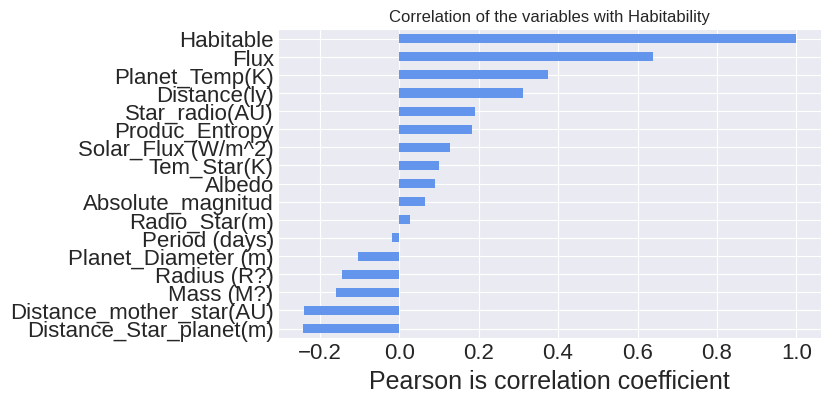

In [19]:
train.corrwith(train.Habitable).sort_values().plot.barh(figsize=(7,4), color='cornflowerblue')
plt.xlabel('Pearson is correlation coefficient')
plt.savefig('CorrelationHabitability.svg', format='svg')
plt.title('Correlation of the variables with Habitability', fontsize = 12);

En la grafica superior podemos ver una fuerte correlación entre las variables que tienen mayor peso  sobre la habitabilidad

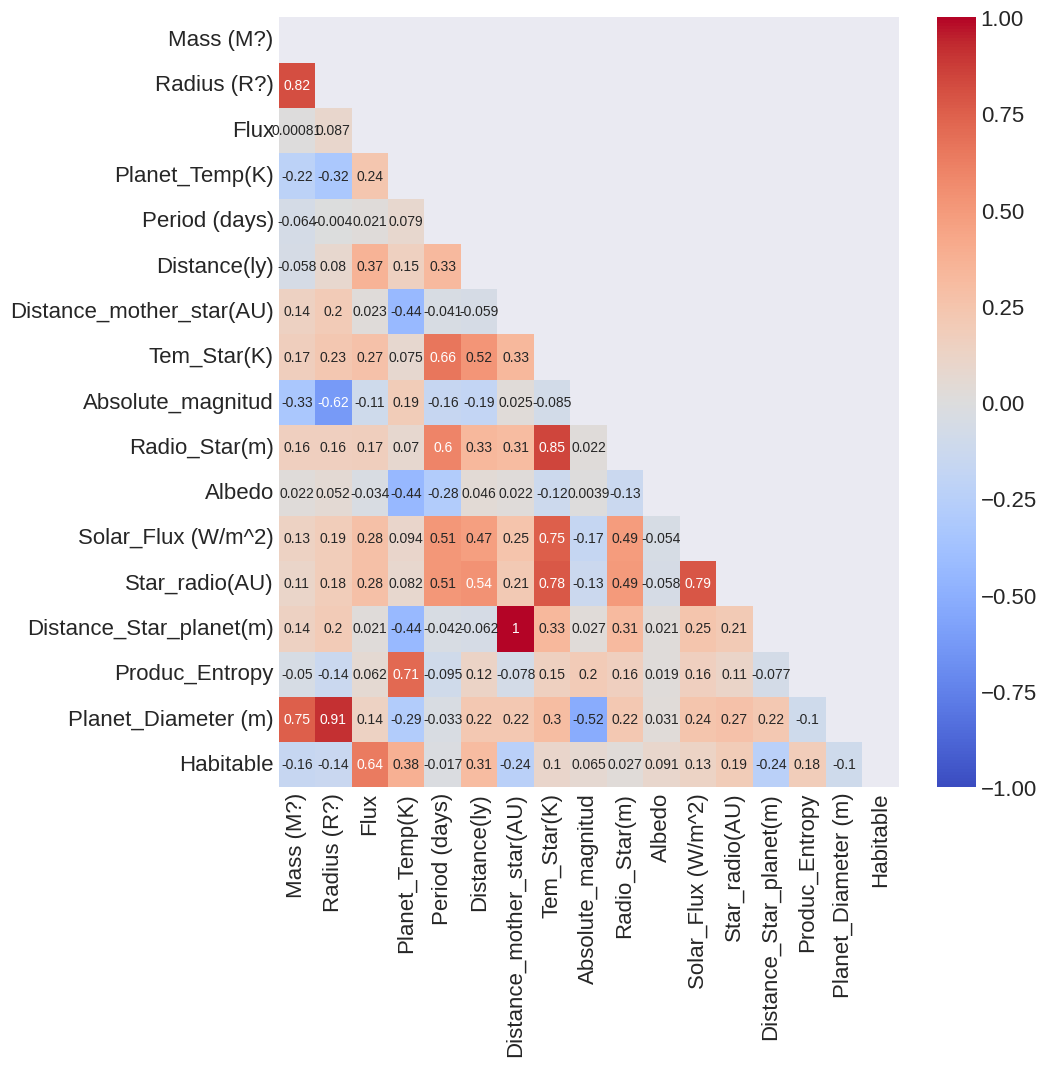

In [20]:
plt.figure(figsize=(10,10))
corr_df = train.corr()
mask = np.triu(np.ones_like(corr_df))
plt.savefig('ColorMap.svg', format='svg')
sns.heatmap(train.corr(),cmap='coolwarm',annot=True, annot_kws={'fontsize':10}, mask=mask, vmin=-1, vmax=1);

    Above: Heat map with the correlation between variables. The more red the greater the correlation.

In [21]:
x_names = ['Distance_mother_star(AU)', 'Tem_Star(K)', 'Albedo',
           'Solar_Flux (W/m^2)', 'Star_radio(AU)', 'Produc_Entropy','Flux',
          'Planet_Temp(K)', 'Distance(ly)']

# Entrenamiento 

In [22]:
# Standarized
x_std = (train[x_names] - train[x_names].mean()) / train[x_names].std()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(train[x_names], train.Habitable, test_size=0.2, random_state=69)

In [24]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [1]:
# Trainning the model 
model = LogisticRegression()
model.fit(x_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [2]:
# Making the predictions
y_hat = model.predict(x_test)

# Y vemos las primeras 10 predicciones (sólo para comprobar que tenemos únicamentete valores de 0 y 1)
y_hat[:10]

NameError: name 'model' is not defined

In [27]:
y_hat_proba = model.predict_proba(x_test)
y_hat_proba[:10]

array([[0.32687788, 0.67312212],
       [0.14559904, 0.85440096],
       [0.11336413, 0.88663587],
       [0.24876213, 0.75123787],
       [0.00977462, 0.99022538],
       [0.01269542, 0.98730458],
       [0.12634406, 0.87365594],
       [0.12901425, 0.87098575],
       [0.00900841, 0.99099159],
       [0.9616806 , 0.0383194 ]])

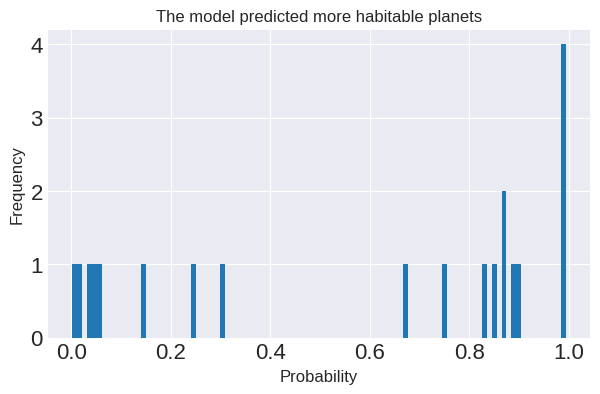

In [28]:
pd.DataFrame(y_hat_proba)[1].hist(bins=100, figsize = (7,4))
plt.title('The model predicted more habitable planets', fontsize = 12)
plt.savefig('MoreHabitablePlanets.svg', format='svg')
plt.xlabel('Probability', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

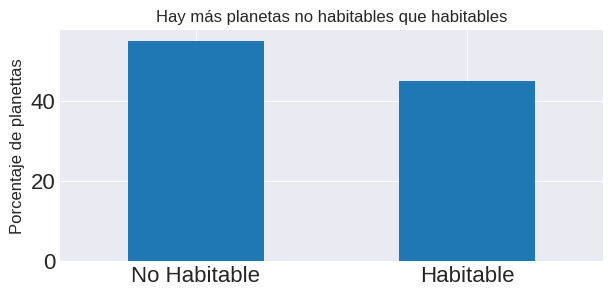

In [29]:
plt.figure(figsize = (7,3))
(y_test.value_counts(normalize = True) * 100).plot.bar(rot = 0)
plt.title('Hay más planetas no habitables que habitables', fontsize = 12)
plt.ylabel('Porcentaje de planettas', fontsize=12)
plt.savefig('MoreHabitablePlanets_v2_nose.svg', format='svg')
plt.xticks([0, 1], ['No Habitable', 'Habitable']);

The model learned more from the non habitable planets.

In [30]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



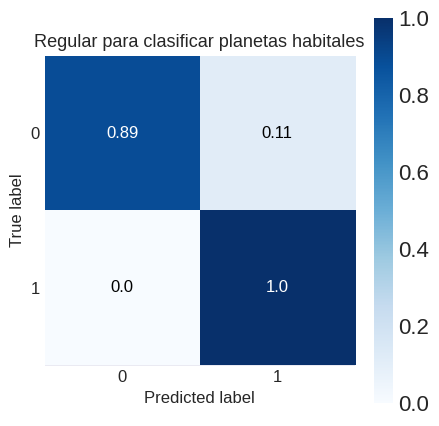

In [31]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat, normalize = True, figsize=(5,5),text_fontsize='12')
plt.title('Regular para clasificar planetas habitales', fontsize = 13);
plt.savefig('FirstHeatPlanet.svg', format='svg')

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 36 to 54
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Distance_mother_star(AU)  79 non-null     float64
 1   Tem_Star(K)               79 non-null     float64
 2   Albedo                    79 non-null     float64
 3   Solar_Flux (W/m^2)        79 non-null     float64
 4   Star_radio(AU)            79 non-null     float64
 5   Produc_Entropy            79 non-null     float64
 6   Flux                      79 non-null     float64
 7   Planet_Temp(K)            79 non-null     float64
 8   Distance(ly)              79 non-null     float64
dtypes: float64(9)
memory usage: 6.2 KB


In [33]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 72 to 89
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Distance_mother_star(AU)  20 non-null     float64
 1   Tem_Star(K)               20 non-null     float64
 2   Albedo                    20 non-null     float64
 3   Solar_Flux (W/m^2)        20 non-null     float64
 4   Star_radio(AU)            20 non-null     float64
 5   Produc_Entropy            20 non-null     float64
 6   Flux                      20 non-null     float64
 7   Planet_Temp(K)            20 non-null     float64
 8   Distance(ly)              20 non-null     float64
dtypes: float64(9)
memory usage: 1.6 KB


In [34]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat))

Área bajo la curva ROC:  0.944


In [35]:
print('Log Loss: %1.3f' % log_loss(y_test,y_hat))

Log Loss: 1.727


El modelo tiene un buen grado de predicció por lo tanto lo vamos adejar como esta. 

In [36]:
y_train.value_counts()

1    44
0    35
Name: Habitable, dtype: int64

### Bosque Aleatorio

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# tamaño grid ntrees
NT =8
max_depth = 2
min_trees = 1
max_trees = 40

grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')


#matriz para guardar resultado de ecm
error = np.zeros((NT))
for j,ntrees in enumerate(grid_tree):
    clf = RandomForestClassifier(n_estimators= ntrees, 
                                 max_depth = max_depth, random_state =3)

# hacer unestimación sobre train
    clf.fit(x_train, y_train)
# hagamos un predict: tst
    score = roc_auc_score(y_test, clf.predict(x_test))
# y guardemos
    error[j] = score
    print("iteracion:",
          j+1,
          "numero de arboles:",
          ntrees,
          "error:", round(score,3))

iteracion: 1 numero de arboles: 1 error: 0.753
iteracion: 2 numero de arboles: 6 error: 0.944
iteracion: 3 numero de arboles: 12 error: 1.0
iteracion: 4 numero de arboles: 17 error: 1.0
iteracion: 5 numero de arboles: 23 error: 0.944
iteracion: 6 numero de arboles: 28 error: 1.0
iteracion: 7 numero de arboles: 34 error: 1.0
iteracion: 8 numero de arboles: 40 error: 1.0


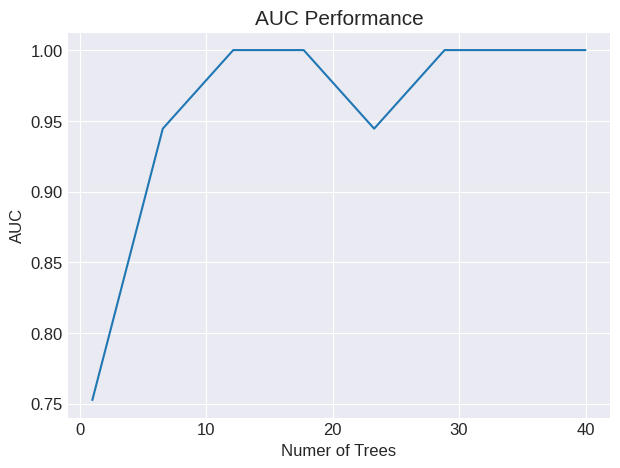

In [39]:
plt.figure(figsize=(7,5))
plt.title('AUC Performance', fontsize = 15)
plt.plot(np.linspace(min_trees, max_trees, NT), error)
plt.xlabel('Numer of Trees', fontsize = 12)
plt.ylabel('AUC', fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('AUC_Performance.svg', format='svg')
plt.grid(True);

In [40]:
max_trees = 40
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')

#matriz para guardar resultado de ecm
error = np.zeros((NT))
for j,ntrees in enumerate(grid_tree):
    clf = RandomForestClassifier(n_estimators= ntrees,
                                 max_depth = max_depth,
                                random_state = 3)

# hacer unestimación sobre train
    clf.fit(x_train, y_train)
# hagamos un predict: tst
    score = log_loss(y_test, clf.predict(x_test))
# y guardemos
    error[j] = score
    print("iteracion:",
          j+1,
          "number of trees:",
          ntrees,
          "error:",
          round(score,3))

iteracion: 1 number of trees: 1 error: 8.635
iteracion: 2 number of trees: 6 error: 1.727
iteracion: 3 number of trees: 12 error: 0.0
iteracion: 4 number of trees: 17 error: 0.0
iteracion: 5 number of trees: 23 error: 1.727
iteracion: 6 number of trees: 28 error: 0.0
iteracion: 7 number of trees: 34 error: 0.0
iteracion: 8 number of trees: 40 error: 0.0


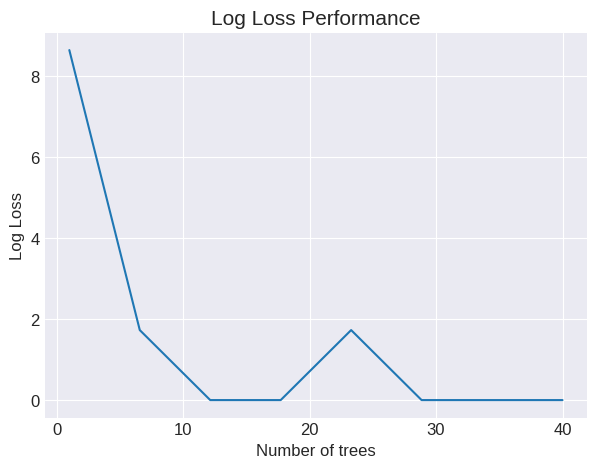

In [41]:
plt.figure(figsize=(7,5))
plt.title('Log Loss Performance', fontsize = 15)
plt.plot(np.linspace(min_trees, max_trees, NT), error)
plt.xlabel('Number of trees', fontsize = 12)
plt.ylabel('Log Loss', fontsize=12)
plt.savefig('LogLossPerformance.svg', format='svg')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True);

In [42]:
#Tamaño grid depth
ND = 4
min_depth = 1
max_depth = 4
grid_depth = np.linspace(min_depth,max_depth,ND).astype('int')
# tamaño grid ntrees
NT = 5
min_trees = 1
max_trees = 40
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')

error = np.zeros((ND,NT))

for i, max_depth in enumerate(grid_depth):
    for j,ntrees in enumerate(grid_tree):
        clf = RandomForestClassifier(n_estimators= ntrees,
                                     max_depth = max_depth,
                                    random_state = 4)
        # hacer unestimación sobre train
        clf.fit(x_train, y_train)
    # hagamos un predict: tst
        score = roc_auc_score(y_test, clf.predict(x_test))
    # y guardemos
        error[i,j] = score
        print("it:",
              j+1,
              "arboles:",
              ntrees,
              "profundidad:",
              max_depth,
              "error:",
              round(score,3))
        
        

it: 1 arboles: 1 profundidad: 1 error: 0.833
it: 2 arboles: 10 profundidad: 1 error: 1.0
it: 3 arboles: 20 profundidad: 1 error: 1.0
it: 4 arboles: 30 profundidad: 1 error: 1.0
it: 5 arboles: 40 profundidad: 1 error: 1.0
it: 1 arboles: 1 profundidad: 2 error: 0.833
it: 2 arboles: 10 profundidad: 2 error: 1.0
it: 3 arboles: 20 profundidad: 2 error: 1.0
it: 4 arboles: 30 profundidad: 2 error: 1.0
it: 5 arboles: 40 profundidad: 2 error: 1.0
it: 1 arboles: 1 profundidad: 3 error: 0.722
it: 2 arboles: 10 profundidad: 3 error: 1.0
it: 3 arboles: 20 profundidad: 3 error: 1.0
it: 4 arboles: 30 profundidad: 3 error: 1.0
it: 5 arboles: 40 profundidad: 3 error: 1.0
it: 1 arboles: 1 profundidad: 4 error: 0.722
it: 2 arboles: 10 profundidad: 4 error: 1.0
it: 3 arboles: 20 profundidad: 4 error: 1.0
it: 4 arboles: 30 profundidad: 4 error: 1.0
it: 5 arboles: 40 profundidad: 4 error: 1.0


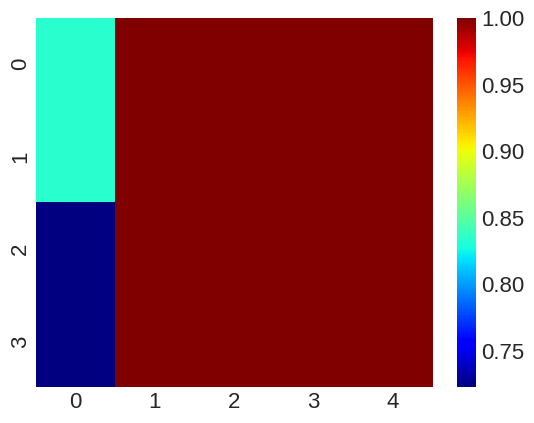

In [43]:
import seaborn as sns
sns.heatmap(error, cmap ='jet')
plt.savefig('SecondHeatMap.svg', format='svg')

In [44]:
clf = RandomForestClassifier(n_estimators= 13, 
                                 max_depth = 2, 
                             random_state = 8)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=13, random_state=8)

In [45]:
y_pred_RF = clf.predict(x_test)

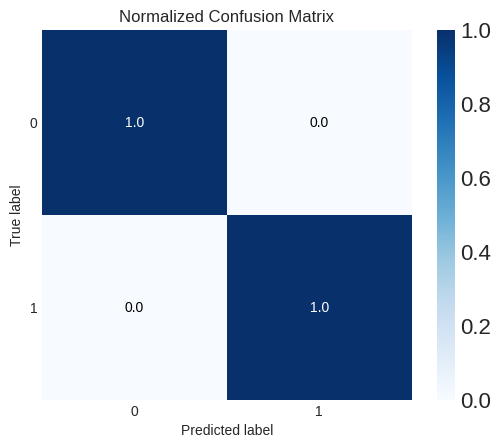

In [46]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_RF, normalize = True);
plt.savefig('ThirdHeatMap.svg', format='svg')

In [47]:
print('Area under the ROC curve:',"% 1.3f" % roc_auc_score(y_test,y_pred_RF))

Area under the ROC curve:  1.000


In [48]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred_RF))

Log Loss: 0.000


In [49]:
x = x_train.columns

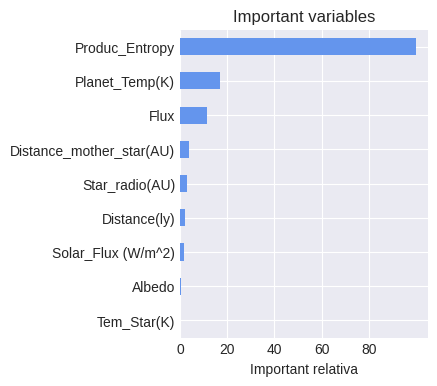

In [51]:
#DF de variables mas importantes
f_imp = pd.DataFrame(clf.feature_importances_,
                     index=x, columns=['imp'])
#calculo de importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)

#plot de importancia de variables
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(3.2,4),
                                                              title='Important variables',color='cornflowerblue', fontsize=10)
plt.xlabel('Important relativa', fontsize=10);
plt.xticks(np.arange(0,100,20));
plt.savefig('ImportantRelativaVariables.svg', format='svg')

In [52]:
pd.get_dummies(train)

,Mass (M?),Radius (R?),Flux,Planet_Temp(K),Period (days),Distance(ly),Distance_mother_star(AU),Tem_Star(K),Absolute_magnitud,Radio_Star(m),...,Refs_Notes_[1][35],Refs_Notes_[1][38],Refs_Notes_[20],Refs_Notes_[21],Refs_Notes_[22],Refs_Notes_[23][1],Refs_Notes_[30],Refs_Notes_[32],Refs_Notes_[41],Refs_Notes_[42][43]
0,1.00000,1.0000,1.00,255.0,365.24,410.000,1.00000,5772.0000,-3.586867,696000000.0,...,0,0,0,0,0,0,0,0,0,0
1,1.05000,1.6100,1.15,264.0,4.91,12.580,0.02520,2637.0000,-4.707970,91176000.0,...,0,0,0,0,0,0,0,0,0,0
2,1.72000,1.1400,0.87,246.0,37.40,101.000,0.17800,3480.0000,-3.276607,292320000.0,...,0,0,0,0,0,0,0,0,0,0
3,2.21000,1.2900,1.11,261.0,24.20,217.000,0.10600,3360.4733,-4.191025,230368344.0,...,0,0,0,0,0,0,0,0,0,0
4,0.30000,0.7800,1.04,258.0,4.05,39.000,0.02228,2566.0000,-3.198191,82963200.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,17.14000,3.8830,1.00,45.0,58.43,410.000,30.07000,5778.0000,-6.818705,696000000.0,...,0,0,0,0,0,0,0,0,0,0
95,0.00218,0.1868,1.00,35.0,58.43,410.000,39.48000,5778.0000,-0.732660,696000000.0,...,0,0,0,0,0,0,0,0,0,0
96,0.02250,0.4040,1.00,83.0,58.43,410.000,10.00000,5778.0000,-1.262045,696000000.0,...,0,0,0,0,0,0,0,0,0,0
97,2.46000,1.6100,1.00,280.0,23.15,34.648,0.10340,3412.0000,-4.707970,218544000.0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
pd.get_dummies(train, drop_first=1)

,Mass (M?),Radius (R?),Flux,Planet_Temp(K),Period (days),Distance(ly),Distance_mother_star(AU),Tem_Star(K),Absolute_magnitud,Radio_Star(m),...,Refs_Notes_[1][35],Refs_Notes_[1][38],Refs_Notes_[20],Refs_Notes_[21],Refs_Notes_[22],Refs_Notes_[23][1],Refs_Notes_[30],Refs_Notes_[32],Refs_Notes_[41],Refs_Notes_[42][43]
0,1.00000,1.0000,1.00,255.0,365.24,410.000,1.00000,5772.0000,-3.586867,696000000.0,...,0,0,0,0,0,0,0,0,0,0
1,1.05000,1.6100,1.15,264.0,4.91,12.580,0.02520,2637.0000,-4.707970,91176000.0,...,0,0,0,0,0,0,0,0,0,0
2,1.72000,1.1400,0.87,246.0,37.40,101.000,0.17800,3480.0000,-3.276607,292320000.0,...,0,0,0,0,0,0,0,0,0,0
3,2.21000,1.2900,1.11,261.0,24.20,217.000,0.10600,3360.4733,-4.191025,230368344.0,...,0,0,0,0,0,0,0,0,0,0
4,0.30000,0.7800,1.04,258.0,4.05,39.000,0.02228,2566.0000,-3.198191,82963200.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,17.14000,3.8830,1.00,45.0,58.43,410.000,30.07000,5778.0000,-6.818705,696000000.0,...,0,0,0,0,0,0,0,0,0,0
95,0.00218,0.1868,1.00,35.0,58.43,410.000,39.48000,5778.0000,-0.732660,696000000.0,...,0,0,0,0,0,0,0,0,0,0
96,0.02250,0.4040,1.00,83.0,58.43,410.000,10.00000,5778.0000,-1.262045,696000000.0,...,0,0,0,0,0,0,0,0,0,0
97,2.46000,1.6100,1.00,280.0,23.15,34.648,0.10340,3412.0000,-4.707970,218544000.0,...,0,0,0,0,0,0,0,0,0,0


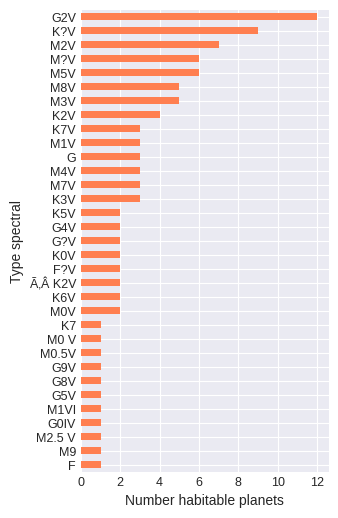

In [54]:
plt.figure(figsize=(3.2,6))
train.groupby('Star_type').Habitable.count().sort_values(
    ascending = True).plot.barh(color='coral')
plt.xlabel('Number habitable planets', fontsize = 10)
plt.ylabel('Type spectral',fontsize = 10)
plt.xticks((np.arange(0,14,2)),fontsize = 9)
plt.yticks(fontsize = 9);
plt.savefig('fullNumberHabPlanets.svg', format='svg')